# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

- Check for missing values and report the number and percentage of missing data for each column.

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

- Generate bar plots for at least three categorical columns and discuss the frequency distributions.

- Identify outliers in at least one numerical column using boxplots.

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [7]:
import pandas as pd

In [8]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
15567   61         State-gov  159908          11th              7   
9263    26       Federal-gov  211596       Masters             14   
6203    50           Private  182360       HS-grad              9   
243     20                 ?  119156  Some-college             10   
6447    60  Self-emp-not-inc  235535       HS-grad              9   
11824   50         Local-gov   20795  Some-college             10   
29477   44           Private   34722  Some-college             10   
27277   33           Private  137088     Bachelors             13   
20652   32       Federal-gov  115066       HS-grad              9   
4194    18           Private  129010          12th              8   

           marital-status         occupation   relationship   race     sex  \
15567             Widowed      Other-service      Unmarried  White  Female   
9263        Never-married     Prof-specialty  Not-in-family  White    Male   
6203            Separated     Prof-specialty      Unmarried  Other  Female   
243         Never-married                  ?      Own-child  White    Male   
6447   Married-civ-spouse    Exec-managerial        Husband  White    Male   
11824  Married-civ-spouse    Protective-serv        Husband  White    Male   
29477  Married-civ-spouse              Sales        Husband  White    Male   
27277  Married-civ-spouse  Machine-op-inspct        Husband  Other    Male   
20652  Married-civ-spouse       Tech-support        Husband  White    Male   
4194        Never-married       Craft-repair      Own-child  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
15567             0             0              32  United-States   >50K  
9263              0             0              40  United-States  <=50K  
6203              0             0              60    Puerto-Rico  <=50K  
243               0             0              20  United-States  <=50K  
6447              0             0              48  United-States  <=50K  
11824             0             0              40  United-States   >50K  
29477             0             0              55  United-States  <=50K  
27277             0             0              40        Ecuador  <=50K  
20652             0             0              40  United-States  <=50K  
4194              0             0              10  United-States  <=50K

Preprocessing completed. Train and test data saved.


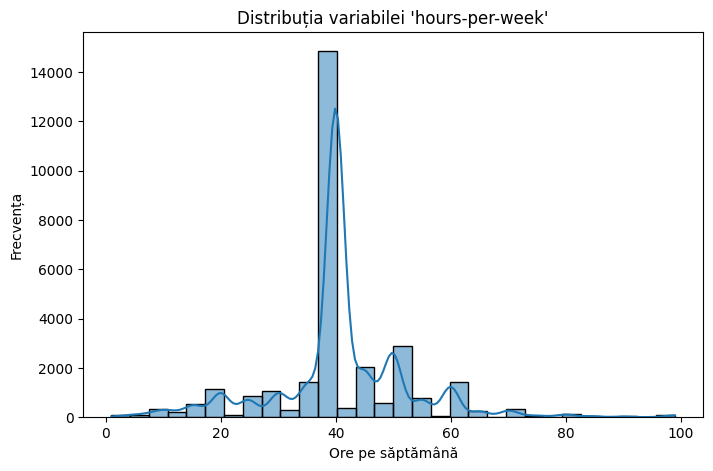

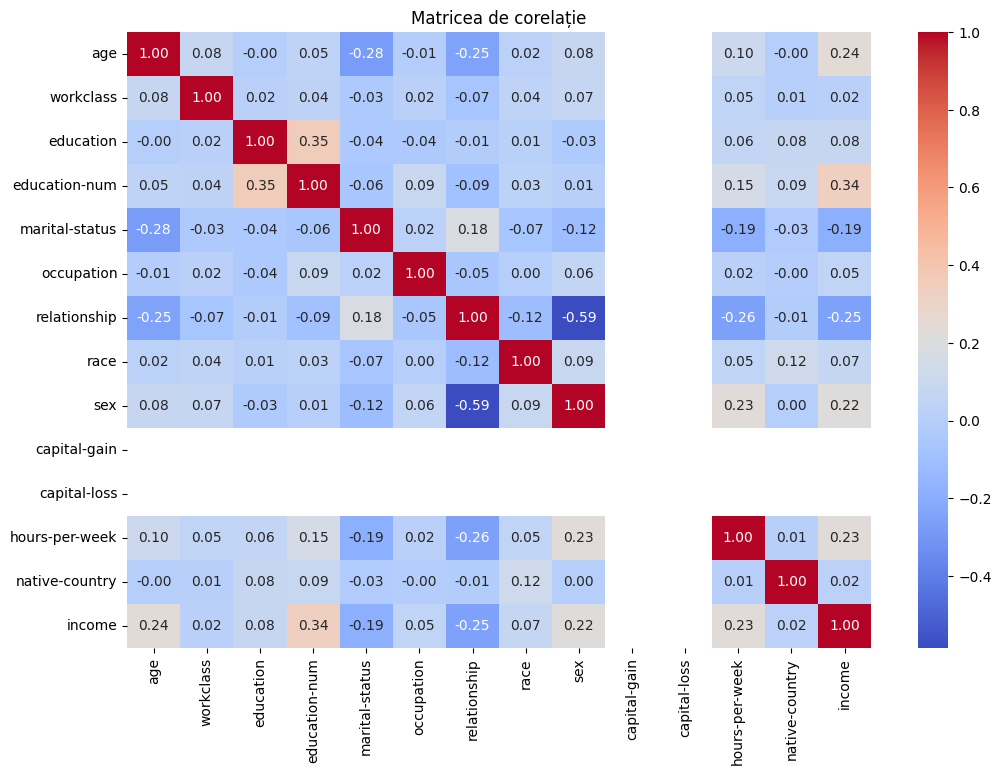

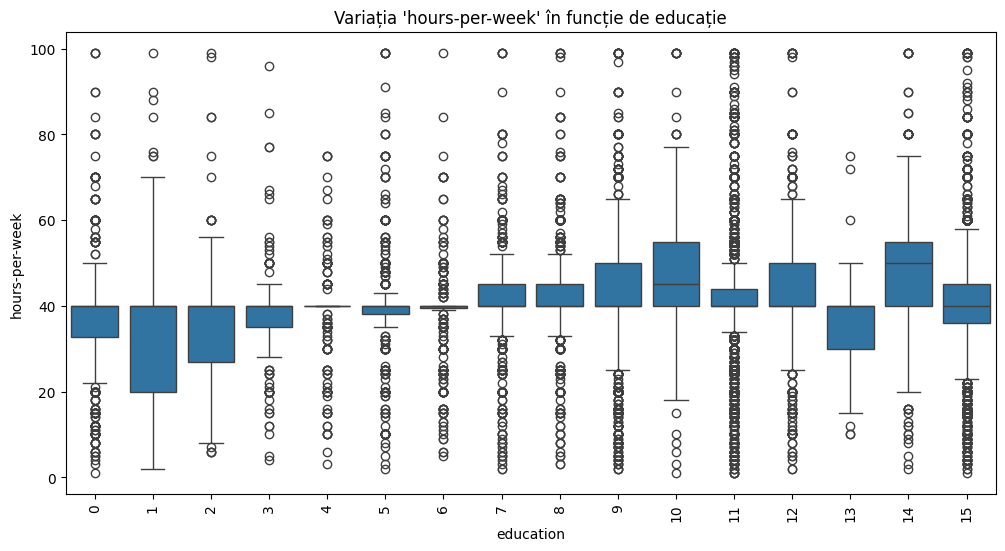

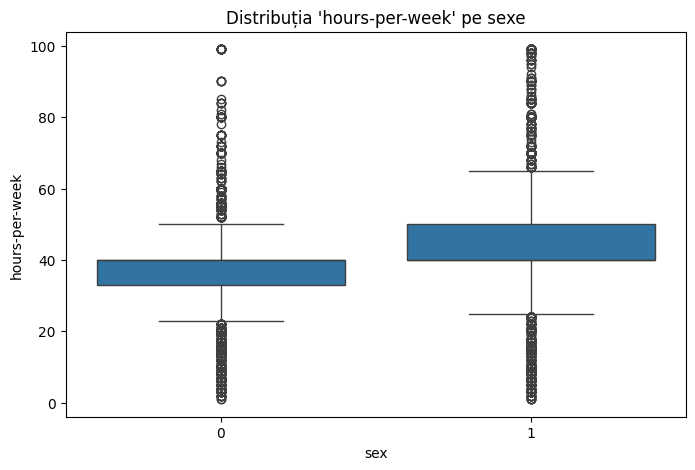

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"]

data = pd.read_csv(url, names=columns, na_values=" ?")

# Handle missing values
data.dropna(inplace=True)

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Define target variable
target = "hours-per-week"

# Convert numerical columns to proper data type
numerical_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
data[numerical_features] = data[numerical_features].apply(pd.to_numeric, errors="coerce")

# Handle missing values in numerical features (if any)
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())

# Outlier handling: Clip values instead of removing them
def clip_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

data = clip_outliers(data, numerical_features[:-1])  # Exclude target variable from outlier handling

# Categorical feature encoding
categorical_features = ["workclass", "education", "marital-status", "occupation", 
                        "relationship", "race", "sex", "native-country"]

data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Check for NaN values before standardization
if data_encoded[numerical_features[:-1]].isna().sum().sum() > 0:
    print("Warning: NaN values detected before standardization! Filling with median.")
    data_encoded[numerical_features[:-1]] = data_encoded[numerical_features[:-1]].fillna(data_encoded[numerical_features[:-1]].median())

# Standardization of numerical features (excluding target variable)
scaler = StandardScaler()
data_encoded[numerical_features[:-1]] = scaler.fit_transform(data_encoded[numerical_features[:-1]])

# Split into train and test sets
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save processed data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

print("Preprocessing completed. Train and test data saved.")



preprocessed_data = data.dropna()


preprocessed_data = preprocessed_data.drop(columns=["fnlwgt"])


categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    preprocessed_data[col] = le.fit_transform(preprocessed_data[col])
    label_encoders[col] = le  


preprocessed_data.sample(10)

# Vizualizarea distribuției variabilei țintă
plt.figure(figsize=(8, 5))
sns.histplot(preprocessed_data["hours-per-week"], bins=30, kde=True)
plt.title("Distribuția variabilei 'hours-per-week'")
plt.xlabel("Ore pe săptămână")
plt.ylabel("Frecvența")
plt.show()

# Matricea de corelație
plt.figure(figsize=(12, 8))
sns.heatmap(preprocessed_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matricea de corelație")
plt.show()

# Boxplot pentru a analiza variația numărului de ore lucrate în funcție de nivelul de educație
plt.figure(figsize=(12, 6))
sns.boxplot(x=preprocessed_data["education"], y=preprocessed_data["hours-per-week"])
plt.xticks(rotation=90)
plt.title("Variația 'hours-per-week' în funcție de educație")
plt.show()

# Analiza distribuției pe sexe
plt.figure(figsize=(8, 5))
sns.boxplot(x=preprocessed_data["sex"], y=preprocessed_data["hours-per-week"])
plt.title("Distribuția 'hours-per-week' pe sexe")
plt.show()


Prin cele 4 grafice am explorat distributia orelor lucrate pe saptamana si relatia acestei variabile cu alti factori cum ar fi nivelul de educatie, sexul si alte variabile socio-economice.

Din histograma se poate observa faptul ca majorittea persoanelor lucreaza 40 de ore pe saptamana, insa exista si valori externe care arata faptul ca sunt persoane care lureaza mai mult sau mi putin pe saptmana.
Din primul grafic boxplot se poate observa modul in care orele de munca sunt distribuite in functie de nivelul de educatie. Mediana orelor lucrate este relativ constanta, in jur de 40 de ore pe saptamana, pentru majoritatea nivelurilor de educatie. Persoaele cu un nivel de educatie mai ridicat au o dispersie mai mre a orelor de munca. Acest lucru poate indica ca acestia fie muncesc mai mult, aproximativ 50-60 de ore, fie au joburi mai flexibile cu mai putine ore. Exista numerosi outlieri la toate nivelurile de educatie, ceea ce sugereaza ca unii indivizi muncesc fie extrem de putin, fie excesiv de mult, indiferent de educatie. Astfel ca, educatia nu influenteaza direct numarul de ore lucrate, dar poate contribui la o mai mre variabilitate in programul de lucru. 

Urmatorul boxplot compara distributia orelor de munca intre barbati si de femei. Media si mediana sunt apropiate dar dispersia si prezenta outlierilor sugereaza faptul ca unii barbati tind sa lucreze mai multe ore. Femeile au o distributie mai compact, ceea ce sugereaza os tabilitate mai mare in orele de munca. Astfel ca, desi orele de munca sunt similare intre sexe, barbatii tind sa lucreze mai multe ore, ceea ce poate fi influentat de industrie, pozitie profesionala sau reponsabilitatile economice sau sociale. 

Matricea de corelatie prezinta relatii semnificative intre variabile. Variabila hours-per-week are o corelatie slaba cu variabila educatia (aprox. 0.15-0.2), indicand ca nivelul de studii nu determina direct orele de munca. Variabile precum `occupation` si `workclass` pot avea un impact mai mare asupra orelor lucrate.
